In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.model_selection import train_test_split

In [3]:
from sklearn.svm import SVC

In [4]:
from sklearn.metrics import confusion_matrix

In [5]:
from sklearn.model_selection import validation_curve

In [6]:
from sklearn.model_selection import KFold

In [7]:
from sklearn.model_selection import GridSearchCV

In [8]:
from sklearn.model_selection import cross_val_score

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
from sklearn.neighbors import KNeighborsClassifier


In [26]:
trainbase = pd.read_csv('Datas/train_data.csv')

In [27]:
testbase = pd.read_csv('Datas/test_features.csv')

In [29]:
trainbase.shape

(3680, 59)

In [30]:
trainbase.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,ham,Id
0,0.0,14.28,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,...,0.000,0.0,0.000,0.000,0.0,1.800,5,9,True,1947
1,0.0,0.00,1.0,0.0,0.50,0.0,0.0,0.00,0.0,0.50,...,0.357,0.0,0.892,0.000,0.0,2.000,19,172,False,2159
2,0.0,0.00,0.0,0.0,0.00,0.0,0.0,1.29,0.0,0.43,...,0.124,0.0,0.310,0.062,0.0,1.477,8,65,False,4223
3,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,...,0.000,0.0,0.444,0.000,0.0,2.800,7,28,True,2624
4,0.0,0.00,0.0,0.0,1.17,0.0,0.0,0.00,0.0,1.17,...,0.000,0.0,0.000,0.000,0.0,1.551,10,45,True,2743


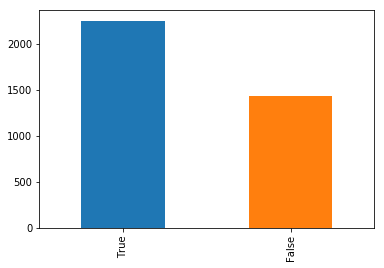

In [33]:
trainbase["ham"].value_counts().plot(kind = 'bar')

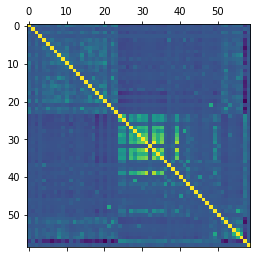

In [34]:
plt.matshow(trainbase.corr())

In [35]:
correlacoes = trainbase.corr()
correlacoes_ham = correlacoes['ham'].abs()
correlacoes_ham.sort_values()

word_freq_will                0.004761
Id                            0.009994
word_freq_address             0.032665
word_freq_parts               0.033768
word_freq_report              0.049788
word_freq_table               0.050372
char_freq_;                   0.058599
word_freq_3d                  0.059354
char_freq_[                   0.065686
char_freq_#                   0.069380
word_freq_direct              0.069602
word_freq_conference          0.076721
char_freq_(                   0.081794
word_freq_font                0.089653
word_freq_project             0.096527
word_freq_cs                  0.098561
word_freq_415                 0.108707
capital_run_length_average    0.110157
word_freq_857                 0.110809
word_freq_data                0.114990
word_freq_pm                  0.123369
word_freq_telnet              0.123488
word_freq_make                0.127528
word_freq_mail                0.129478
word_freq_lab                 0.131442
word_freq_people         

In [36]:
Xtrainspam = trainbase[["word_freq_your","word_freq_000","char_freq_$","word_freq_remove",
                      "word_freq_you","word_freq_free","word_freq_business","capital_run_length_total",
                      "word_freq_hp","word_freq_hpl","word_freq_order","word_freq_receive","word_freq_our",
                      "char_freq_!","word_freq_over","word_freq_credit","word_freq_money","capital_run_length_longest",
                      "word_freq_internet","word_freq_all","word_freq_addresses","word_freq_email","word_freq_george",
                      "word_freq_labs","word_freq_1999","word_freq_650","word_freq_edu"]]


In [37]:
Xtestspam = testbase[["word_freq_your","word_freq_000","char_freq_$","word_freq_remove",
                      "word_freq_you","word_freq_free","word_freq_business","capital_run_length_total",
                      "word_freq_hp","word_freq_hpl","word_freq_order","word_freq_receive","word_freq_our",
                      "char_freq_!","word_freq_over","word_freq_credit","word_freq_money","capital_run_length_longest",
                      "word_freq_internet","word_freq_all","word_freq_addresses","word_freq_email","word_freq_george",
                      "word_freq_labs","word_freq_1999","word_freq_650","word_freq_edu"]]


In [38]:
Ytrainspam = trainbase.ham

In [42]:
n_neighborsMaiorScore = 0
melhorneighbors = 0
for n_neighborsTemp in range(2, 100, 1):
    knn = KNeighborsClassifier(n_neighbors = n_neighborsTemp)
    scores = cross_val_score(knn, Xtrainspam, Ytrainspam, cv = 10)
    scores
    if scores.mean() > n_neighborsMaiorScore:
        n_neighborsMaiorScore = scores.mean()
        melhorneighbors = n_neighborsTemp

In [43]:
n_neighborsMaiorScore

0.799177853835759

In [45]:
melhorneighbors

3

In [47]:
knn.fit(Xtrainspam, Ytrainspam)
YTestPred = knn.predict(Xtestspam)
YTestPred

array([False,  True, False,  True,  True, False,  True,  True,  True,
       False,  True, False, False,  True, False, False,  True, False,
        True,  True,  True, False,  True,  True, False,  True,  True,
        True, False,  True,  True,  True, False,  True, False, False,
        True,  True, False,  True, False,  True, False, False,  True,
       False, False, False,  True,  True,  True,  True,  True,  True,
       False, False,  True, False,  True, False,  True,  True, False,
        True,  True, False, False,  True, False,  True,  True,  True,
        True, False,  True,  True, False,  True,  True,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
       False, False,  True,  True,  True,  True,  True,  True,  True,
       False, False,  True, False,  True, False, False, False,  True,
       False,  True,  True,  True,  True, False,  True,  True,  True,
        True,  True, False, False,  True,  True, False,  True, False,
        True,  True,

In [51]:
sub = pd.DataFrame({"id": testbase.Id, "ham" : YTestPred})
sub.to_csv("submission_csv", index = False)
sub

,id,ham
0,1351,False
1,1687,True
2,1297,False
3,2101,True
4,3920,True
5,3313,False
6,4102,True
7,3836,True
8,394,True
9,219,False
